In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the filtered Onion + Maharashtra subset
df = pd.read_csv("../data/processed/onion_maharashtra_filtered.csv")
print("Loaded shape:", df.shape)
df.head()

Loaded shape: (10877, 10)


,State,District,Market,Commodity,Variety,Grade,Min_Price,Max_Price,Modal_Price,Date
0,Maharashtra,nashik,Lasalgaon(Vinchur),Onion,Other,FAQ,500.0,1600.0,1351.0,2023-01-07
1,Maharashtra,satara,Satara,Onion,Other,FAQ,300.0,1300.0,800.0,2023-01-07
2,Maharashtra,jalgaon,Bhusaval,Onion,Other,FAQ,700.0,1000.0,800.0,2023-01-07
3,Maharashtra,ahmednagar,Rahuri(Vambori),Onion,Other,FAQ,100.0,1800.0,1000.0,2023-01-07
4,Maharashtra,dhule,Dhule,Onion,Red,FAQ,350.0,1470.0,800.0,2023-01-07


In [2]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10877 entries, 0 to 10876
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   State        10877 non-null  object 
 1   District     10877 non-null  object 
 2   Market       10877 non-null  object 
 3   Commodity    10877 non-null  object 
 4   Variety      10877 non-null  object 
 5   Grade        10877 non-null  object 
 6   Min_Price    10877 non-null  float64
 7   Max_Price    10877 non-null  float64
 8   Modal_Price  10877 non-null  float64
 9   Date         10877 non-null  object 
dtypes: float64(3), object(7)
memory usage: 849.9+ KB


State          0
District       0
Market         0
Commodity      0
Variety        0
Grade          0
Min_Price      0
Max_Price      0
Modal_Price    0
Date           0
dtype: int64

In [3]:
# 1) Fix Date column
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
print("Bad dates (NaT):", df['Date'].isna().sum())

# Drop rows with invalid dates
df = df.dropna(subset=['Date'])
df = df.sort_values('Date')

# 2) Convert price columns to numeric
for col in ["Min_Price", "Max_Price", "Modal_Price"]:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    print(f"{col} NaNs:", df[col].isna().sum())

# Drop rows without Modal Price (our target)
df = df.dropna(subset=['Modal_Price'])

print("After cleaning shape:", df.shape)
df.head()

Bad dates (NaT): 0
Min_Price NaNs: 0
Max_Price NaNs: 0
Modal_Price NaNs: 0
After cleaning shape: (10877, 10)


,State,District,Market,Commodity,Variety,Grade,Min_Price,Max_Price,Modal_Price,Date
1160,Maharashtra,ahmednagar,Pathardi,Onion,Red,FAQ,200.0,900.0,600.0,2023-06-06
1187,Maharashtra,nashik,Dindori(Vani),Onion,Other,FAQ,500.0,1575.0,850.0,2023-06-06
1188,Maharashtra,nagpur,Ramtek,Onion,Other,FAQ,1000.0,1400.0,1200.0,2023-06-06
1189,Maharashtra,ahmednagar,Rahata,Onion,Other,FAQ,200.0,1400.0,950.0,2023-06-06
1190,Maharashtra,nashik,Nasik,Onion,Other,FAQ,325.0,1275.0,700.0,2023-06-06


In [4]:
lower = df["Modal_Price"].quantile(0.01)
upper = df["Modal_Price"].quantile(0.99)

df["Modal_Price"] = df["Modal_Price"].clip(lower, upper)

print("Clipped Modal_Price between", lower, "and", upper)

Clipped Modal_Price between 650.0 and 5500.0


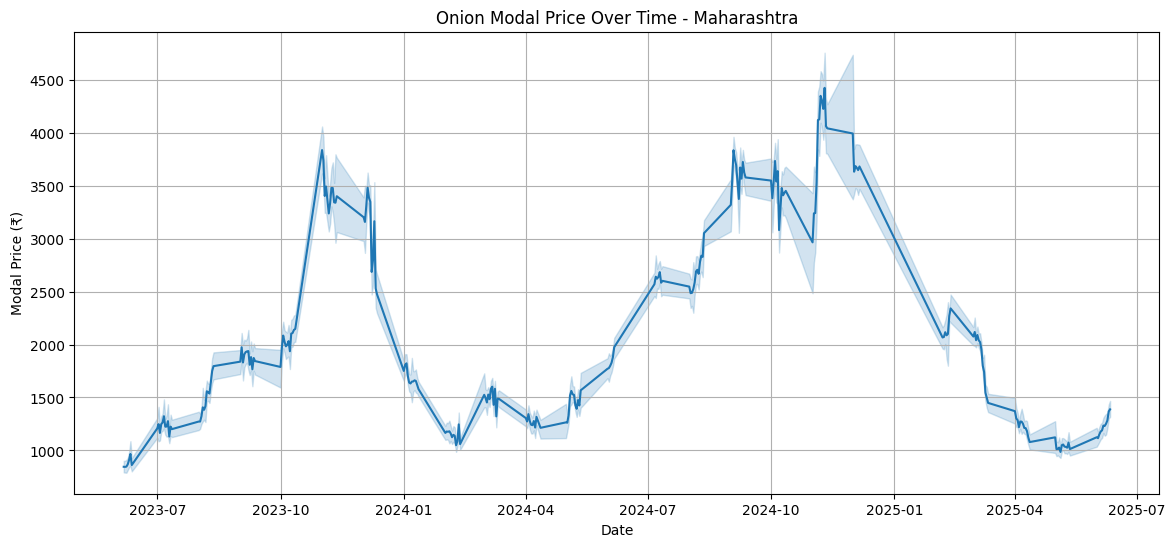

In [5]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='Date', y='Modal_Price')
plt.title("Onion Modal Price Over Time - Maharashtra")
plt.xlabel("Date")
plt.ylabel("Modal Price (₹)")
plt.grid(True)
plt.show()

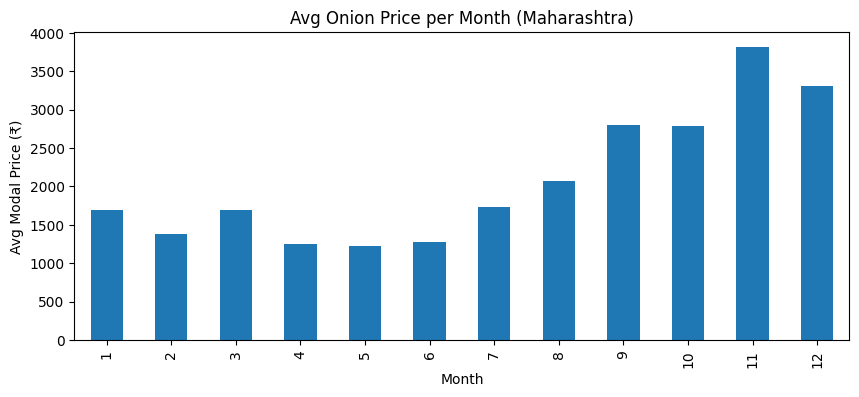

In [6]:
df['Month'] = df['Date'].dt.month

plt.figure(figsize=(10, 4))
df.groupby('Month')['Modal_Price'].mean().plot(kind='bar')
plt.title("Avg Onion Price per Month (Maharashtra)")
plt.xlabel("Month")
plt.ylabel("Avg Modal Price (₹)")
plt.show()

In [7]:
df.to_csv("../data/processed/onion_maharashtra_cleaned.csv", index=False)
print("Saved cleaned dataset.")
print("Final cleaned shape:", df.shape)

Saved cleaned dataset.
Final cleaned shape: (10877, 11)
